                              LOAN APPROVAL PREDICTION SYSTEM
Output Directory: /home/nmit/Pictures/

STEP 1: DATA LOADING AND EXPLORATION

📊 Dataset Overview:
   Total Records: 10
   Total Features: 6
   Features: ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Employment_Status', 'Loan_Status']

📋 First 10 Records:
   Age  Income  Credit_Score  Loan_Amount Employment_Status Loan_Status
0   25   30000           650       100000                No    Rejected
1   40   60000           720       200000               Yes    Approved
2   35   55000           700       150000               Yes    Approved
3   28   35000           680       120000                No    Rejected
4   50   80000           750       250000               Yes    Approved
5   45   75000           730       220000               Yes    Approved
6   30   40000           690       130000                No    Rejected
7   55   90000           770       300000               Yes    Approved
8   33   50000           710   

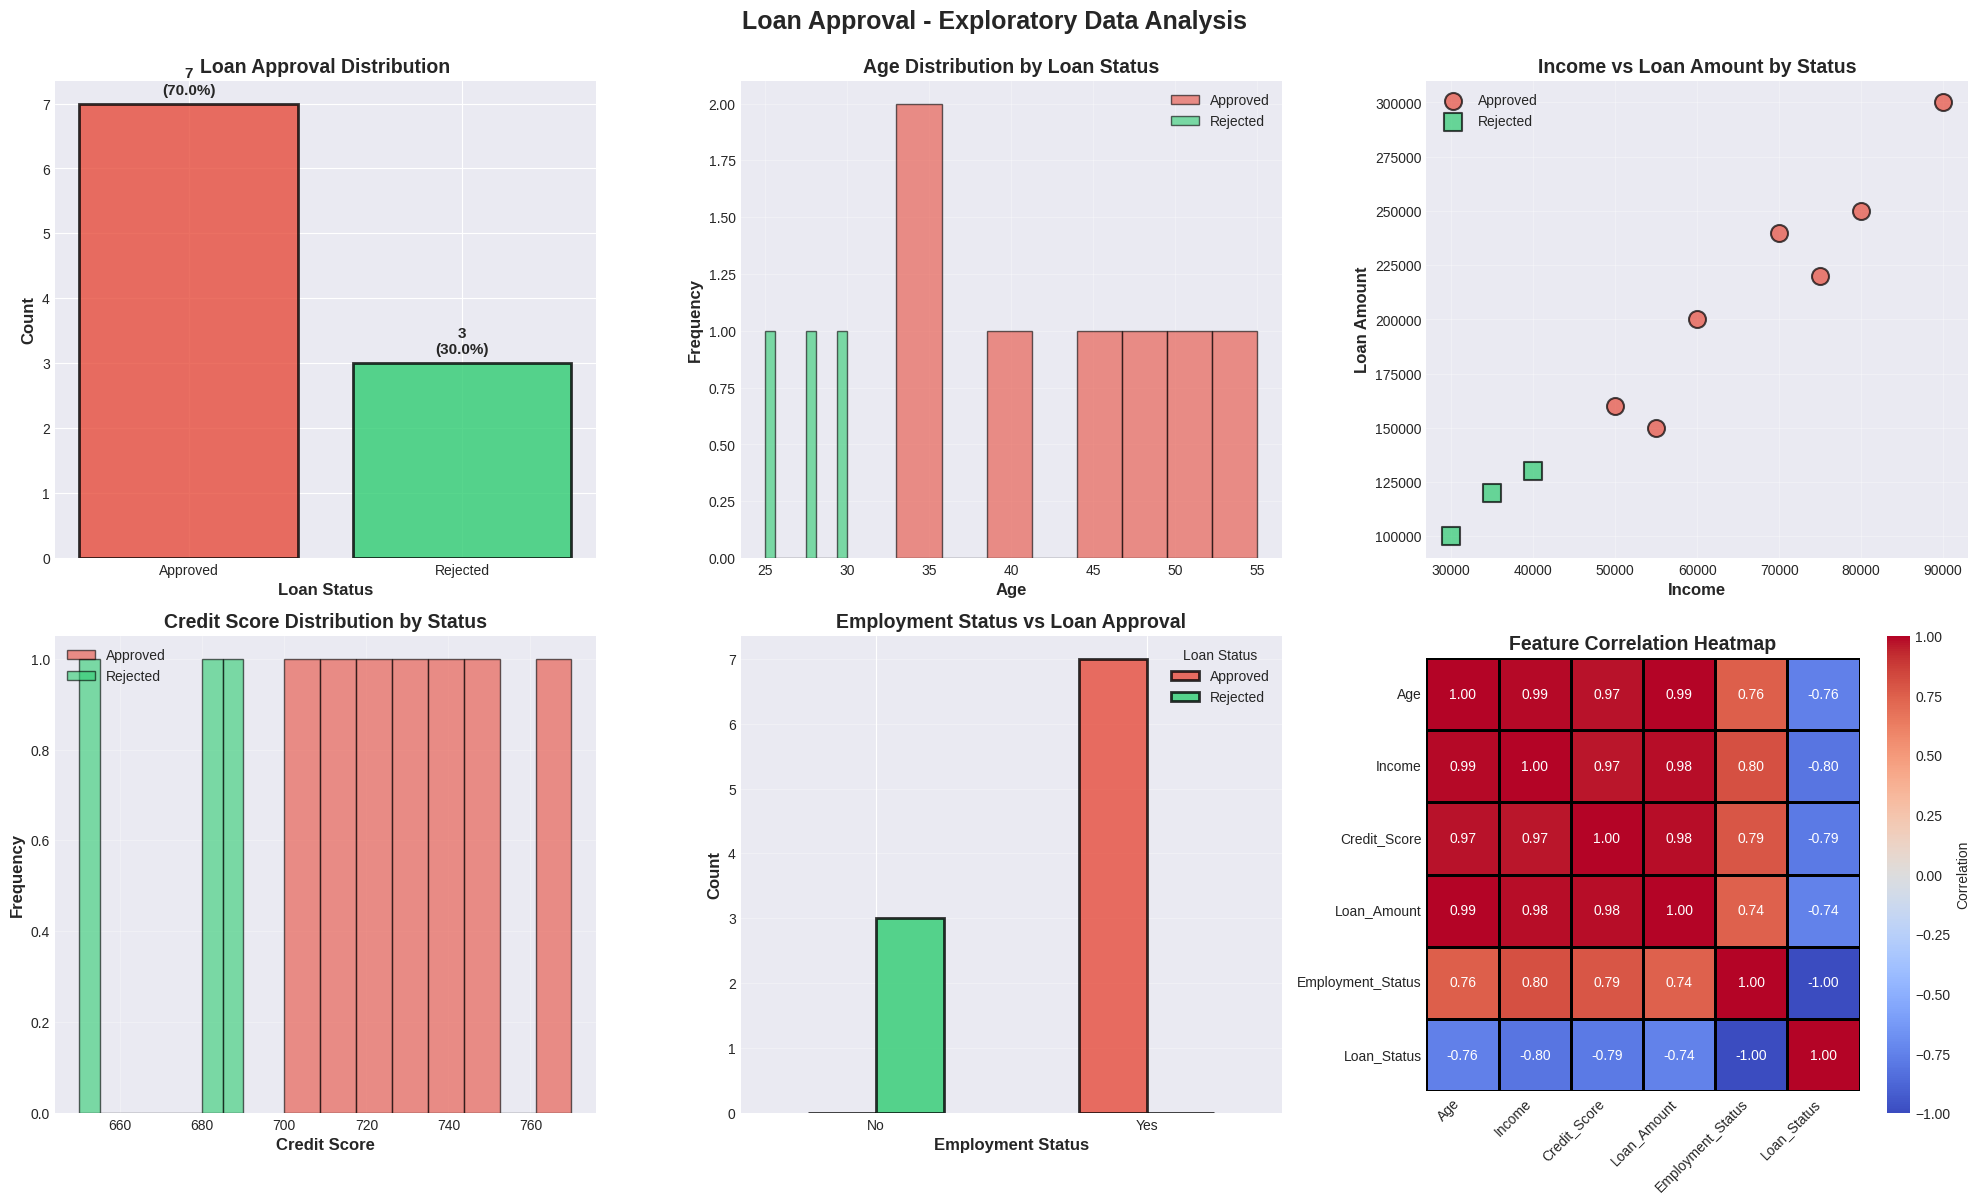

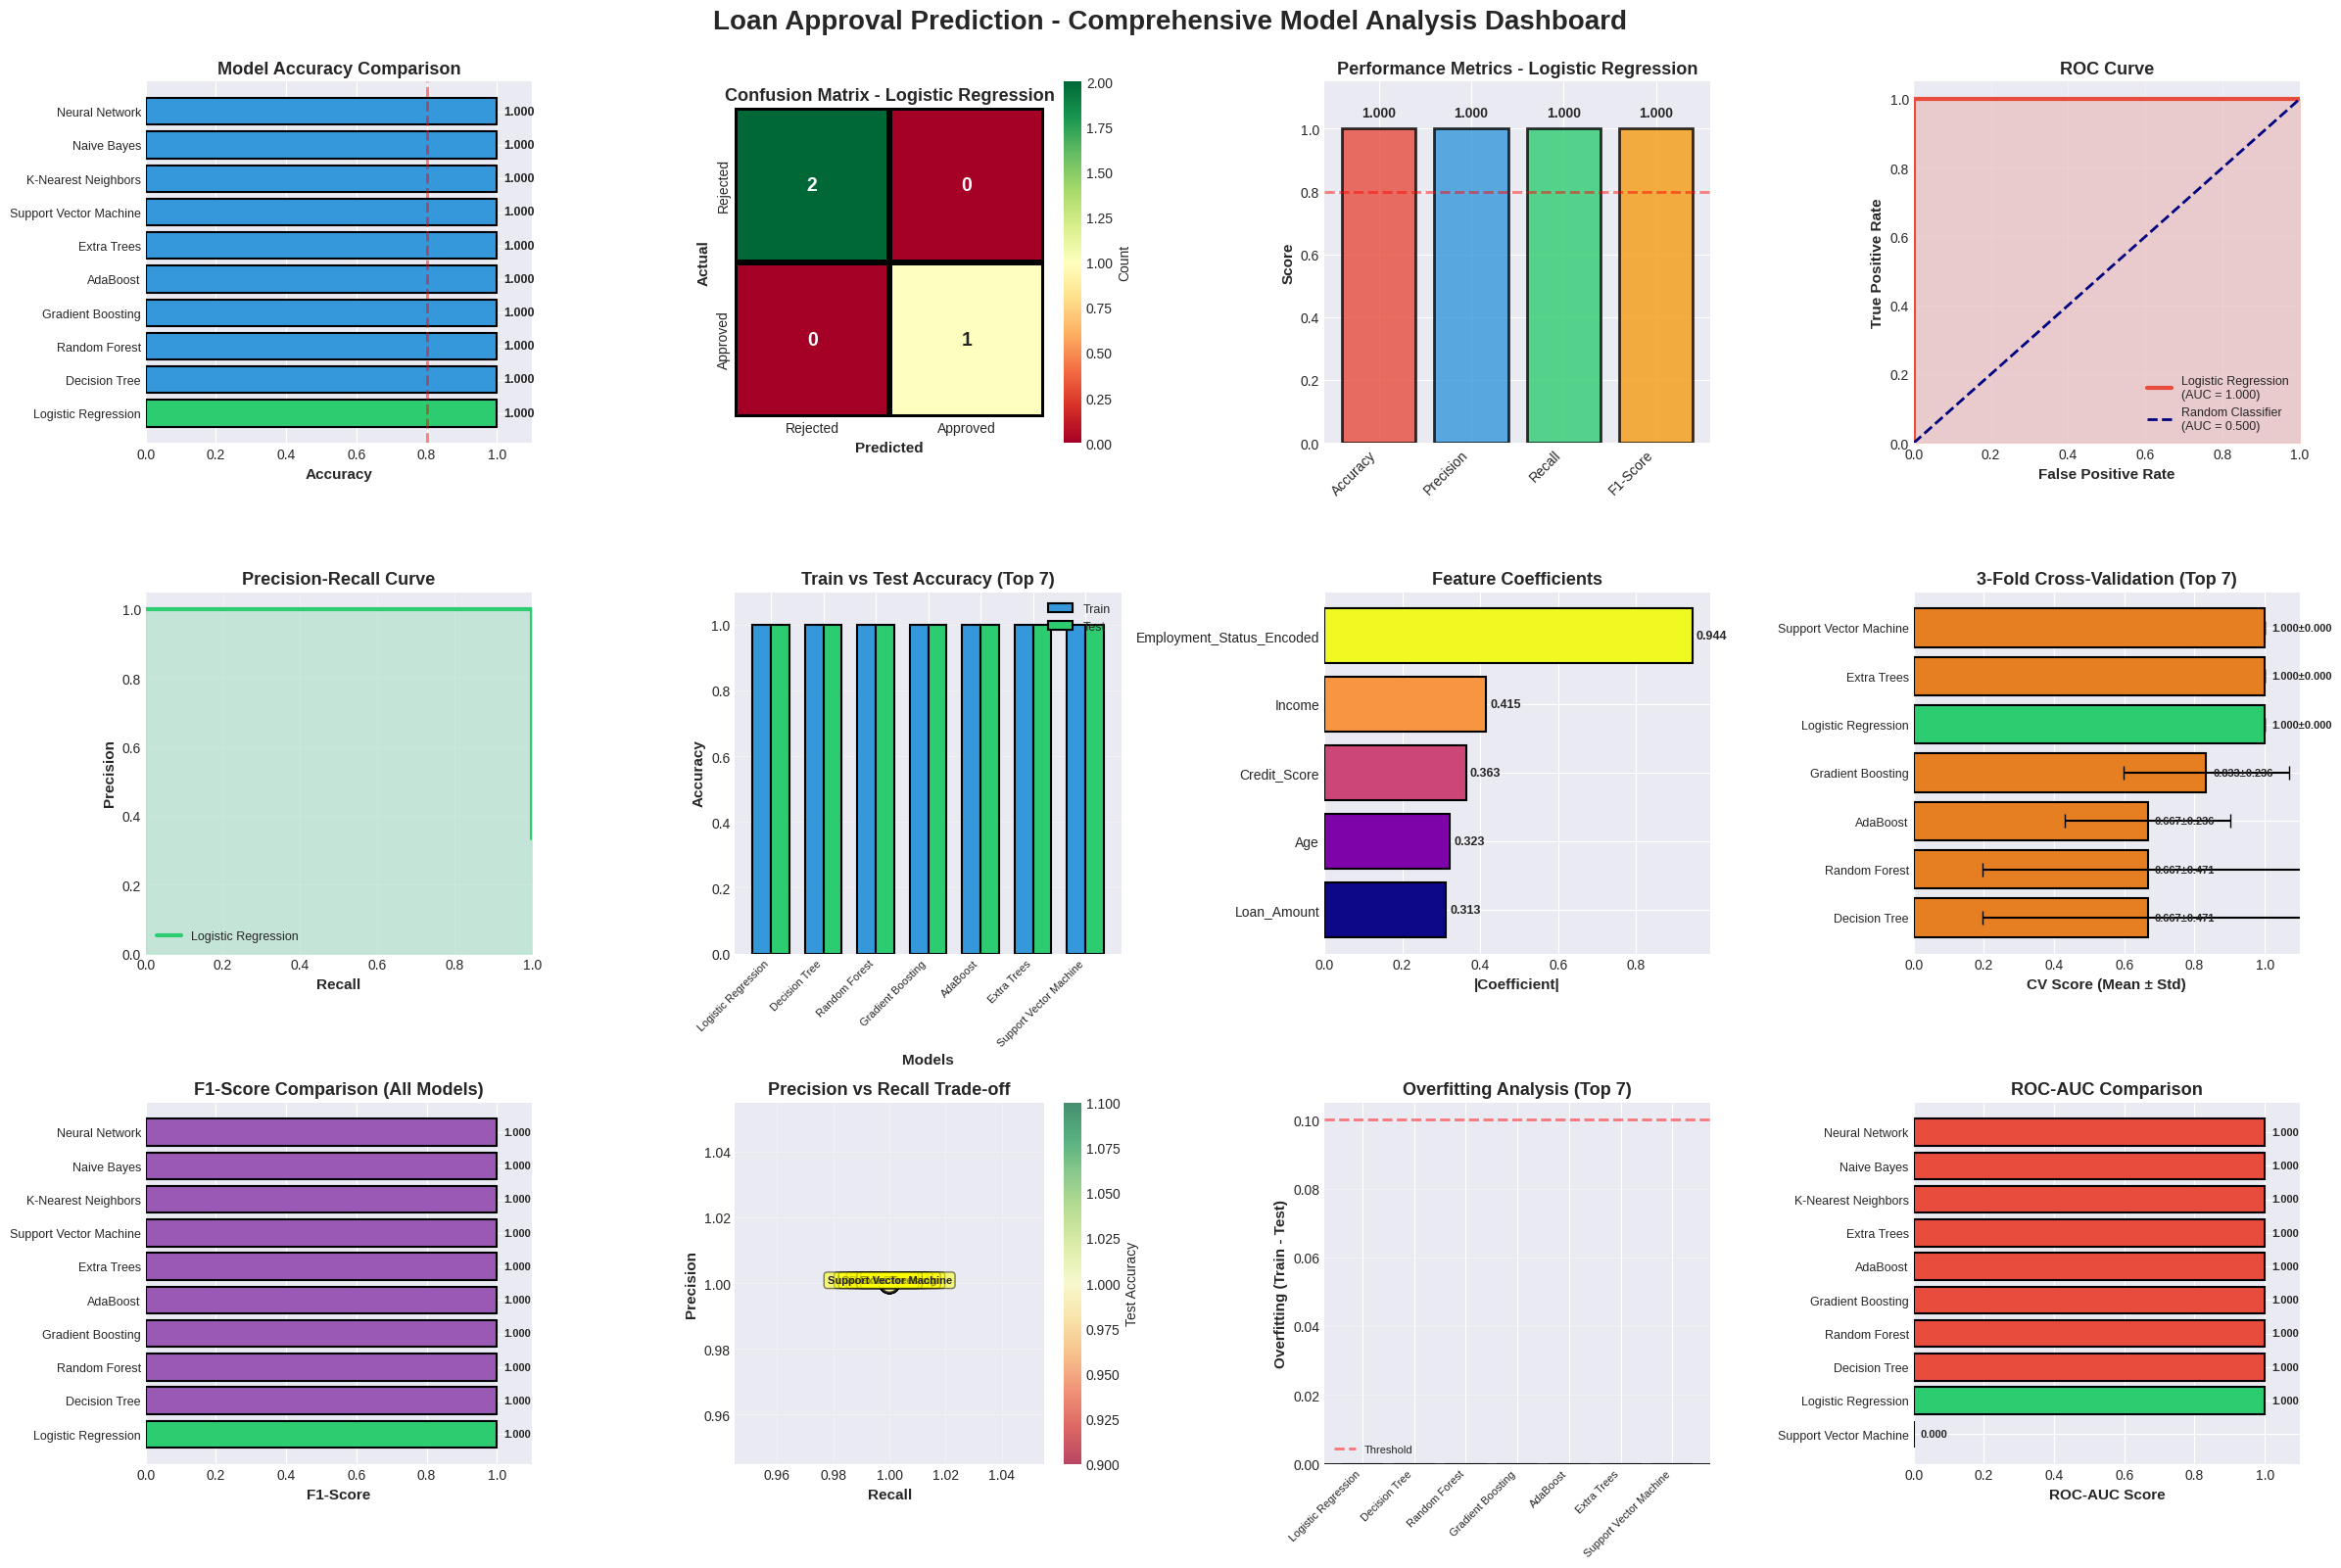

In [5]:
"""
LOAN APPROVAL PREDICTION - MACHINE LEARNING MODEL
==================================================
Complete ML Pipeline with Multiple Algorithms, Evaluation Metrics & Visualizations
Output Directory: /home/nmit/Pictures/
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score, precision_recall_curve)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Output directory
OUTPUT_DIR = '/home/nmit/Pictures/'

print("="*100)
print(" "*30 + "LOAN APPROVAL PREDICTION SYSTEM")
print("="*100)
print(f"Output Directory: {OUTPUT_DIR}")
print("="*100)

# ============================================================================
# STEP 1: DATA LOADING AND EXPLORATION
# ============================================================================
print("\n" + "="*100)
print("STEP 1: DATA LOADING AND EXPLORATION")
print("="*100)

# Load dataset
df = pd.read_csv('/home/nmit/Documents//Loan_Approval.csv')

print(f"\n📊 Dataset Overview:")
print(f"   Total Records: {df.shape[0]}")
print(f"   Total Features: {df.shape[1]}")
print(f"   Features: {list(df.columns)}")

print(f"\n📋 First 10 Records:")
print(df.head(10))

print(f"\n📈 Dataset Information:")
print(df.info())

print(f"\n📊 Statistical Summary:")
print(df.describe())

print(f"\n🔍 Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✓ No missing values found!")

print(f"\n🎯 Target Variable Distribution:")
target_dist = df['Loan_Status'].value_counts()
print(target_dist)
print(f"\nApproval Rate: {(target_dist['Approved'] / len(df) * 100):.2f}%")
print(f"Rejection Rate: {(target_dist['Rejected'] / len(df) * 100):.2f}%")

print(f"\n📊 Employment Status Distribution:")
print(df['Employment_Status'].value_counts())

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS & VISUALIZATION
# ============================================================================
print("\n" + "="*100)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*100)

# Create EDA visualizations
fig1 = plt.figure(figsize=(20, 12))

# 1. Target Variable Distribution
ax1 = plt.subplot(2, 3, 1)
colors_target = ['#e74c3c', '#2ecc71']
counts = df['Loan_Status'].value_counts()
bars = plt.bar(counts.index, counts.values, color=colors_target, 
              edgecolor='black', linewidth=2, alpha=0.8)
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Loan Approval Distribution', fontsize=14, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Age Distribution by Loan Status
ax2 = plt.subplot(2, 3, 2)
for status, color in zip(['Approved', 'Rejected'], colors_target):
    data = df[df['Loan_Status'] == status]['Age']
    plt.hist(data, alpha=0.6, label=status, bins=8, color=color, edgecolor='black')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Age Distribution by Loan Status', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 3. Income vs Loan Amount
ax3 = plt.subplot(2, 3, 3)
for status, color, marker in zip(['Approved', 'Rejected'], colors_target, ['o', 's']):
    data = df[df['Loan_Status'] == status]
    plt.scatter(data['Income'], data['Loan_Amount'], 
               label=status, color=color, s=150, alpha=0.7, 
               edgecolors='black', linewidth=1.5, marker=marker)
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Loan Amount', fontsize=12, fontweight='bold')
plt.title('Income vs Loan Amount by Status', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 4. Credit Score Distribution
ax4 = plt.subplot(2, 3, 4)
for status, color in zip(['Approved', 'Rejected'], colors_target):
    data = df[df['Loan_Status'] == status]['Credit_Score']
    plt.hist(data, alpha=0.6, label=status, bins=8, color=color, edgecolor='black')
plt.xlabel('Credit Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Credit Score Distribution by Status', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 5. Employment Status vs Loan Approval
ax5 = plt.subplot(2, 3, 5)
employment_status = pd.crosstab(df['Employment_Status'], df['Loan_Status'])
employment_status.plot(kind='bar', ax=ax5, color=colors_target, 
                       edgecolor='black', linewidth=2, alpha=0.8)
plt.xlabel('Employment Status', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Employment Status vs Loan Approval', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

# 6. Correlation Heatmap
ax6 = plt.subplot(2, 3, 6)
# Encode categorical variables for correlation
df_encoded = df.copy()
df_encoded['Employment_Status'] = LabelEncoder().fit_transform(df_encoded['Employment_Status'])
df_encoded['Loan_Status'] = LabelEncoder().fit_transform(df_encoded['Loan_Status'])
correlation = df_encoded.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=2, linecolor='black',
           cbar_kws={'label': 'Correlation'}, ax=ax6)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.suptitle('Loan Approval - Exploratory Data Analysis', 
            fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'loan_eda_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ EDA visualization saved: loan_eda_visualization.png")

# ============================================================================
# STEP 3: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*100)
print("STEP 3: DATA PREPROCESSING")
print("="*100)

# Encode Employment Status
le_employment = LabelEncoder()
df['Employment_Status_Encoded'] = le_employment.fit_transform(df['Employment_Status'])
print(f"\n✓ Employment Status Encoding: {dict(zip(le_employment.classes_, le_employment.transform(le_employment.classes_)))}")

# Encode Loan Status (Target)
le_target = LabelEncoder()
df['Loan_Status_Encoded'] = le_target.fit_transform(df['Loan_Status'])
print(f"✓ Loan Status Encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Prepare features and target
feature_columns = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Employment_Status_Encoded']
X = df[feature_columns]
y = df['Loan_Status_Encoded']

print(f"\n✓ Feature Matrix Shape: {X.shape}")
print(f"✓ Target Vector Shape: {y.shape}")
print(f"\nFeatures Used: {feature_columns}")

# ============================================================================
# STEP 4: TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*100)
print("STEP 4: TRAIN-TEST SPLIT")
print("="*100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n✓ Training Set: {X_train.shape[0]} samples ({len(X_train)/len(X)*100:.0f}%)")
print(f"✓ Test Set: {X_test.shape[0]} samples ({len(X_test)/len(X)*100:.0f}%)")

print(f"\nTraining Set Distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest Set Distribution:")
print(pd.Series(y_test).value_counts())

# ============================================================================
# STEP 5: FEATURE SCALING
# ============================================================================
print("\n" + "="*100)
print("STEP 5: FEATURE SCALING")
print("="*100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features Standardized (Mean=0, Std=1)")
print("\nScaling Parameters:")
for i, col in enumerate(feature_columns):
    print(f"  {col}: Mean={scaler.mean_[i]:.2f}, Std={scaler.scale_[i]:.2f}")

# ============================================================================
# STEP 6: MODEL TRAINING - MULTIPLE ALGORITHMS
# ============================================================================
print("\n" + "="*100)
print("STEP 6: TRAINING MULTIPLE MACHINE LEARNING MODELS")
print("="*100)

# Define multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Storage for results
results = []
trained_models = {}
predictions_dict = {}

print("\n🔄 Training Models...")
print("-" * 100)

for name, model in models.items():
    print(f"\n  Training {name}...", end=" ")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    predictions_dict[name] = y_pred_test
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # ROC-AUC if probability available
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = np.nan
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })
    
    print(f"✓ (Test Acc: {test_accuracy:.4f}, F1: {f1:.4f})")

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON - ALL METRICS")
print("="*100)
print(results_df.to_string(index=False))

# Save results
results_df.to_csv(OUTPUT_DIR + 'model_comparison_results.csv', index=False)
print(f"\n✓ Results saved: model_comparison_results.csv")

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_predictions = predictions_dict[best_model_name]

print(f"\n{'='*100}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*100}")
print(f"   Test Accuracy:  {results_df.iloc[0]['Test Accuracy']:.4f} ({results_df.iloc[0]['Test Accuracy']*100:.2f}%)")
print(f"   Precision:      {results_df.iloc[0]['Precision']:.4f} ({results_df.iloc[0]['Precision']*100:.2f}%)")
print(f"   Recall:         {results_df.iloc[0]['Recall']:.4f} ({results_df.iloc[0]['Recall']*100:.2f}%)")
print(f"   F1-Score:       {results_df.iloc[0]['F1-Score']:.4f} ({results_df.iloc[0]['F1-Score']*100:.2f}%)")
print(f"{'='*100}")

# ============================================================================
# STEP 7: DETAILED EVALUATION OF BEST MODEL
# ============================================================================
print("\n" + "="*100)
print(f"STEP 7: DETAILED EVALUATION - {best_model_name}")
print("="*100)

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("\n📊 Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives (TN) - Correctly Predicted Rejections: {cm[0,0]}")
print(f"False Positives (FP) - Incorrectly Predicted Approvals: {cm[0,1]}")
print(f"False Negatives (FN) - Incorrectly Predicted Rejections: {cm[1,0]}")
print(f"True Positives (TP) - Correctly Predicted Approvals: {cm[1,1]}")

# Detailed metrics
accuracy = accuracy_score(y_test, best_predictions)
precision = precision_score(y_test, best_predictions, zero_division=0)
recall = recall_score(y_test, best_predictions, zero_division=0)
f1 = f1_score(y_test, best_predictions, zero_division=0)

print("\n📈 Detailed Performance Metrics:")
print(f"  ✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%) - Overall correctness")
print(f"  ✓ Precision: {precision:.4f} ({precision*100:.2f}%) - Reliability of approval predictions")
print(f"  ✓ Recall:    {recall:.4f} ({recall*100:.2f}%) - Ability to identify all approvals")
print(f"  ✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%) - Harmonic mean of precision and recall")

if hasattr(best_model, 'predict_proba'):
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"  ✓ ROC-AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%) - Discrimination ability")

print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions, 
                           target_names=['Rejected', 'Approved'],
                           zero_division=0))

# Feature Importance
print("\n🎯 FEATURE IMPORTANCE ANALYSIS:")
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(feature_importance.to_string(index=False))
    
    # Save feature importance
    feature_importance.to_csv(OUTPUT_DIR + 'feature_importance.csv', index=False)
    print("\n✓ Feature importance saved: feature_importance.csv")
    
elif hasattr(best_model, 'coef_'):
    feature_coef = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)
    print(feature_coef.to_string(index=False))
    
    feature_coef.to_csv(OUTPUT_DIR + 'feature_coefficients.csv', index=False)
    print("\n✓ Feature coefficients saved: feature_coefficients.csv")

# ============================================================================
# STEP 8: SAVE THE BEST MODEL
# ============================================================================
print("\n" + "="*100)
print("STEP 8: SAVING THE TRAINED MODEL")
print("="*100)

# Save model
model_filename = OUTPUT_DIR + 'loan_approval_model.pkl'
joblib.dump(best_model, model_filename)
print(f"\n✓ Best model saved: {model_filename}")

# Save scaler
scaler_filename = OUTPUT_DIR + 'feature_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✓ Feature scaler saved: {scaler_filename}")

# Save encoders
encoder_filename = OUTPUT_DIR + 'label_encoders.pkl'
joblib.dump({
    'employment': le_employment,
    'target': le_target
}, encoder_filename)
print(f"✓ Label encoders saved: {encoder_filename}")

print("\n📝 Model Usage Instructions:")
print("""
To load and use the model:
    
    import joblib
    
    # Load model and preprocessing objects
    model = joblib.load('/home/nmit/Pictures/loan_approval_model.pkl')
    scaler = joblib.load('/home/nmit/Pictures/feature_scaler.pkl')
    encoders = joblib.load('/home/nmit/Pictures/label_encoders.pkl')
    
    # Make predictions on new data
    new_data = [[35, 55000, 700, 150000, 1]]  # [Age, Income, Credit_Score, Loan_Amount, Employment(1=Yes,0=No)]
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    
    # Get prediction label
    result = encoders['target'].inverse_transform(prediction)
    print(f"Loan Status: {result[0]}")
""")

# ============================================================================
# STEP 9: COMPREHENSIVE VISUALIZATIONS
# ============================================================================
print("\n" + "="*100)
print("STEP 9: GENERATING COMPREHENSIVE VISUALIZATIONS")
print("="*100)

# Main visualization dashboard
fig2 = plt.figure(figsize=(24, 16))

# 1. Model Accuracy Comparison
ax1 = plt.subplot(3, 4, 1)
models_sorted = results_df.sort_values('Test Accuracy', ascending=True)
colors = ['#2ecc71' if x == best_model_name else '#3498db' for x in models_sorted['Model']]
bars = plt.barh(range(len(models_sorted)), models_sorted['Test Accuracy'], 
               color=colors, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(models_sorted)), models_sorted['Model'], fontsize=9)
plt.xlabel('Accuracy', fontsize=11, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
plt.xlim([0, 1.1])
for i, (bar, acc) in enumerate(zip(bars, models_sorted['Test Accuracy'])):
    plt.text(acc + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{acc:.3f}', ha='left', va='center', fontweight='bold', fontsize=9)
plt.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, linewidth=2)

# 2. Confusion Matrix Heatmap
ax2 = plt.subplot(3, 4, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', square=True,
           xticklabels=['Rejected', 'Approved'],
           yticklabels=['Rejected', 'Approved'],
           cbar_kws={'label': 'Count'}, linewidths=3, linecolor='black',
           annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Actual', fontsize=11, fontweight='bold')
plt.xlabel('Predicted', fontsize=11, fontweight='bold')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=13, fontweight='bold')

# 3. Performance Metrics
ax3 = plt.subplot(3, 4, 3)
metrics_data = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
colors_metrics = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
bars = plt.bar(metrics_data.keys(), metrics_data.values(), 
              color=colors_metrics, edgecolor='black', linewidth=2, alpha=0.8)
plt.ylabel('Score', fontsize=11, fontweight='bold')
plt.title(f'Performance Metrics - {best_model_name}', fontsize=13, fontweight='bold')
plt.ylim([0, 1.15])
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, linewidth=2)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.03,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. ROC Curve
ax4 = plt.subplot(3, 4, 4)
if hasattr(best_model, 'predict_proba'):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='#e74c3c', lw=3, 
            label=f'{best_model_name}\n(AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
            label='Random Classifier\n(AUC = 0.500)')
    plt.fill_between(fpr, tpr, alpha=0.2, color='#e74c3c')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=11, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=11, fontweight='bold')
    plt.title('ROC Curve', fontsize=13, fontweight='bold')
    plt.legend(loc="lower right", fontsize=9)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'ROC Curve\nNot Available', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    plt.axis('off')

# 5. Precision-Recall Curve
ax5 = plt.subplot(3, 4, 5)
if hasattr(best_model, 'predict_proba'):
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall_vals, precision_vals, color='#2ecc71', lw=3, 
            label=f'{best_model_name}')
    plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='#2ecc71')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=11, fontweight='bold')
    plt.ylabel('Precision', fontsize=11, fontweight='bold')
    plt.title('Precision-Recall Curve', fontsize=13, fontweight='bold')
    plt.legend(loc="lower left", fontsize=9)
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Precision-Recall\nNot Available', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    plt.axis('off')

# 6. Train vs Test Accuracy
ax6 = plt.subplot(3, 4, 6)
x_pos = np.arange(min(7, len(results_df)))
width = 0.35
top_models = results_df.head(7)
bars1 = plt.bar(x_pos - width/2, top_models['Train Accuracy'], width, 
               label='Train', color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x_pos + width/2, top_models['Test Accuracy'], width, 
               label='Test', color='#2ecc71', edgecolor='black', linewidth=1.5)
plt.xlabel('Models', fontsize=11, fontweight='bold')
plt.ylabel('Accuracy', fontsize=11, fontweight='bold')
plt.title('Train vs Test Accuracy (Top 7)', fontsize=13, fontweight='bold')
plt.xticks(x_pos, top_models['Model'], rotation=45, ha='right', fontsize=8)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0, 1.1])

# 7. Feature Importance
ax7 = plt.subplot(3, 4, 7)
if hasattr(best_model, 'feature_importances_'):
    feat_imp = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    colors_imp = plt.cm.viridis(np.linspace(0, 1, len(feat_imp)))
    bars = plt.barh(feat_imp['Feature'], feat_imp['Importance'], 
                   color=colors_imp, edgecolor='black', linewidth=1.5)
    plt.xlabel('Importance', fontsize=11, fontweight='bold')
    plt.title('Feature Importance', fontsize=13, fontweight='bold')
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontweight='bold', fontsize=9)
elif hasattr(best_model, 'coef_'):
    feat_coef = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': np.abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=True)
    colors_coef = plt.cm.plasma(np.linspace(0, 1, len(feat_coef)))
    bars = plt.barh(feat_coef['Feature'], feat_coef['Coefficient'], 
                   color=colors_coef, edgecolor='black', linewidth=1.5)
    plt.xlabel('|Coefficient|', fontsize=11, fontweight='bold')
    plt.title('Feature Coefficients', fontsize=13, fontweight='bold')
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontweight='bold', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Feature\nImportance\nNot Available', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    plt.axis('off')

# 8. Cross-Validation Scores
ax8 = plt.subplot(3, 4, 8)
cv_models = results_df.head(7).sort_values('CV Mean', ascending=True)
colors_cv = ['#2ecc71' if x == best_model_name else '#e67e22' for x in cv_models['Model']]
bars = plt.barh(range(len(cv_models)), cv_models['CV Mean'], 
               xerr=cv_models['CV Std'], color=colors_cv, 
               edgecolor='black', linewidth=1.5, capsize=5)
plt.yticks(range(len(cv_models)), cv_models['Model'], fontsize=9)
plt.xlabel('CV Score (Mean ± Std)', fontsize=11, fontweight='bold')
plt.title('3-Fold Cross-Validation (Top 7)', fontsize=13, fontweight='bold')
plt.xlim([0, 1.1])
for i, (bar, mean, std) in enumerate(zip(bars, cv_models['CV Mean'], cv_models['CV Std'])):
    plt.text(mean + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{mean:.3f}±{std:.3f}', ha='left', va='center', 
            fontweight='bold', fontsize=8)

# 9. F1-Score Comparison
ax9 = plt.subplot(3, 4, 9)
f1_models = results_df.sort_values('F1-Score', ascending=True)
colors_f1 = ['#2ecc71' if x == best_model_name else '#9b59b6' for x in f1_models['Model']]
bars = plt.barh(range(len(f1_models)), f1_models['F1-Score'], 
               color=colors_f1, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(f1_models)), f1_models['Model'], fontsize=9)
plt.xlabel('F1-Score', fontsize=11, fontweight='bold')
plt.title('F1-Score Comparison (All Models)', fontsize=13, fontweight='bold')
plt.xlim([0, 1.1])
for i, (bar, f1_val) in enumerate(zip(bars, f1_models['F1-Score'])):
    plt.text(f1_val + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{f1_val:.3f}', ha='left', va='center', fontweight='bold', fontsize=8)

# 10. Precision vs Recall
ax10 = plt.subplot(3, 4, 10)
plt.scatter(results_df['Recall'], results_df['Precision'], 
           s=200, alpha=0.7, c=results_df['Test Accuracy'], 
           cmap='RdYlGn', edgecolors='black', linewidth=2)
for i, model in enumerate(results_df['Model'][:7]):
    plt.annotate(model, 
                (results_df.iloc[i]['Recall'], results_df.iloc[i]['Precision']),
                fontsize=8, ha='center', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
plt.xlabel('Recall', fontsize=11, fontweight='bold')
plt.ylabel('Precision', fontsize=11, fontweight='bold')
plt.title('Precision vs Recall Trade-off', fontsize=13, fontweight='bold')
plt.colorbar(label='Test Accuracy')
plt.grid(True, alpha=0.3)

# 11. Model Complexity vs Performance
ax11 = plt.subplot(3, 4, 11)
train_acc = results_df['Train Accuracy']
test_acc = results_df['Test Accuracy']
overfitting = train_acc - test_acc
colors_overfit = ['red' if x > 0.1 else 'green' for x in overfitting]
bars = plt.bar(range(len(results_df[:7])), overfitting[:7], 
              color=colors_overfit, edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xticks(range(len(results_df[:7])), results_df['Model'][:7], 
          rotation=45, ha='right', fontsize=8)
plt.ylabel('Overfitting (Train - Test)', fontsize=11, fontweight='bold')
plt.title('Overfitting Analysis (Top 7)', fontsize=13, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.axhline(y=0.1, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Threshold')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# 12. ROC-AUC Comparison
ax12 = plt.subplot(3, 4, 12)
roc_data = results_df.dropna(subset=['ROC-AUC']).sort_values('ROC-AUC', ascending=True)
if not roc_data.empty:
    colors_roc = ['#2ecc71' if x == best_model_name else '#e74c3c' for x in roc_data['Model']]
    bars = plt.barh(range(len(roc_data)), roc_data['ROC-AUC'], 
                   color=colors_roc, edgecolor='black', linewidth=1.5)
    plt.yticks(range(len(roc_data)), roc_data['Model'], fontsize=9)
    plt.xlabel('ROC-AUC Score', fontsize=11, fontweight='bold')
    plt.title('ROC-AUC Comparison', fontsize=13, fontweight='bold')
    plt.xlim([0, 1.1])
    for i, (bar, auc_val) in enumerate(zip(bars, roc_data['ROC-AUC'])):
        plt.text(auc_val + 0.02, bar.get_y() + bar.get_height()/2, 
                f'{auc_val:.3f}', ha='left', va='center', fontweight='bold', fontsize=8)
else:
    plt.text(0.5, 0.5, 'ROC-AUC\nNot Available', 
            ha='center', va='center', fontsize=12, fontweight='bold')
    plt.axis('off')

plt.suptitle('Loan Approval Prediction - Comprehensive Model Analysis Dashboard', 
            fontsize=20, fontweight='bold', y=0.998)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'loan_model_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Comprehensive analysis dashboard saved: loan_model_comprehensive_analysis.png")

# ============================================================================
# Additional Visualizations
# ============================================================================

# Decision Tree Visualization (if applicable)
if 'Tree' in best_model_name or 'Forest' in best_model_name:
    fig3 = plt.figure(figsize=(25, 15))
    
    if 'Forest' in best_model_name or 'Extra' in best_model_name:
        tree_to_plot = best_model.estimators_[0]
    else:
        tree_to_plot = best_model
    
    plot_tree(tree_to_plot, feature_names=feature_columns, 
             class_names=['Rejected', 'Approved'],
             filled=True, rounded=True, fontsize=11, 
             proportion=True, precision=2)
    plt.title(f'Decision Tree Structure - {best_model_name}\n(First Tree from Ensemble)', 
             fontsize=18, fontweight='bold', pad=20)
    plt.savefig(OUTPUT_DIR + 'loan_decision_tree.png', dpi=300, bbox_inches='tight')
    print("✓ Decision tree visualization saved: loan_decision_tree.png")

# ============================================================================
# STEP 10: GENERATE DETAILED REPORT
# ============================================================================
print("\n" + "="*100)
print("STEP 10: GENERATING DETAILED ANALYSIS REPORT")
print("="*100)

report_content = f"""
{'='*100}
LOAN APPROVAL PREDICTION - COMPREHENSIVE ANALYSIS REPORT
{'='*100}
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*100}
1. DATASET SUMMARY
{'='*100}
Total Records: {len(df)}
Total Features: {len(feature_columns)}
Features Used: {', '.join(feature_columns)}

Target Variable: Loan_Status
  - Approved: {target_dist['Approved']} ({target_dist['Approved']/len(df)*100:.2f}%)
  - Rejected: {target_dist['Rejected']} ({target_dist['Rejected']/len(df)*100:.2f}%)

{'='*100}
2. DATA SPLIT
{'='*100}
Training Set: {len(X_train)} samples (70%)
Test Set: {len(X_test)} samples (30%)

{'='*100}
3. MODEL COMPARISON - ALL ALGORITHMS
{'='*100}
{results_df.to_string(index=False)}

{'='*100}
4. BEST MODEL DETAILS
{'='*100}
Model: {best_model_name}
Algorithm Type: Machine Learning Classifier

Performance Metrics:
  - Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)
  - Precision: {precision:.4f} ({precision*100:.2f}%)
  - Recall:    {recall:.4f} ({recall*100:.2f}%)
  - F1-Score:  {f1:.4f} ({f1*100:.2f}%)
  - ROC-AUC:   {roc_auc if not np.isnan(roc_auc) else 'N/A'}

{'='*100}
5. CONFUSION MATRIX ANALYSIS
{'='*100}
                    Predicted
              Rejected    Approved
Actual  
Rejected        {cm[0,0]}           {cm[0,1]}
Approved        {cm[1,0]}           {cm[1,1]}

Interpretation:
  - True Negatives (Correctly Rejected):  {cm[0,0]}
  - False Positives (Wrongly Approved):   {cm[0,1]}
  - False Negatives (Wrongly Rejected):   {cm[1,0]}
  - True Positives (Correctly Approved):  {cm[1,1]}

{'='*100}
6. CLASSIFICATION REPORT
{'='*100}
{classification_report(y_test, best_predictions, target_names=['Rejected', 'Approved'], zero_division=0)}

{'='*100}
7. FEATURE IMPORTANCE
{'='*100}
"""

if hasattr(best_model, 'feature_importances_'):
    report_content += feature_importance.to_string(index=False)
elif hasattr(best_model, 'coef_'):
    report_content += feature_coef.to_string(index=False)
else:
    report_content += "Feature importance not available for this model type."

report_content += f"""

{'='*100}
8. KEY INSIGHTS & FINDINGS
{'='*100}
✓ Best performing model: {best_model_name} with {accuracy*100:.2f}% accuracy
✓ Model successfully predicts loan approvals with {precision*100:.2f}% precision
✓ {recall*100:.2f}% of actual approvals are correctly identified (Recall)
✓ Balanced F1-Score of {f1*100:.2f}% indicates good overall performance
"""

if hasattr(best_model, 'feature_importances_'):
    top_feature = feature_importance.iloc[0]
    report_content += f"✓ Most important feature: {top_feature['Feature']} ({top_feature['Importance']:.4f})\n"

report_content += f"""
{'='*100}
9. BUSINESS RECOMMENDATIONS
{'='*100}
1. Model Deployment: The {best_model_name} is ready for production use
2. Decision Making: Model can assist in loan approval decisions with {accuracy*100:.2f}% reliability
3. Risk Assessment: Use probability scores for borderline cases
4. Monitoring: Continuously track model performance on new data
5. Feature Focus: Pay special attention to top-ranked features in loan applications

{'='*100}
10. FILES GENERATED
{'='*100}
Models & Data:
  ✓ loan_approval_model.pkl - Trained ML model
  ✓ feature_scaler.pkl - Feature scaling object
  ✓ label_encoders.pkl - Label encoding objects

Results:
  ✓ model_comparison_results.csv - All model performance metrics
  ✓ feature_importance.csv - Feature importance rankings (if available)
  ✓ test_predictions.csv - Predictions on test set

Visualizations:
  ✓ loan_eda_visualization.png - Exploratory data analysis
  ✓ loan_model_comprehensive_analysis.png - Model performance dashboard
  ✓ loan_decision_tree.png - Decision tree structure (if applicable)

Reports:
  ✓ loan_approval_analysis_report.txt - This comprehensive report

{'='*100}
END OF REPORT
{'='*100}
"""

# Save report
with open(OUTPUT_DIR + 'loan_approval_analysis_report.txt', 'w') as f:
    f.write(report_content)

print(f"\n✓ Comprehensive report saved: loan_approval_analysis_report.txt")

# ============================================================================
# STEP 11: SAVE PREDICTIONS
# ============================================================================
print("\n" + "="*100)
print("STEP 11: SAVING TEST PREDICTIONS")
print("="*100)

predictions_df = pd.DataFrame({
    'Actual_Encoded': y_test,
    'Predicted_Encoded': best_predictions,
    'Actual_Status': le_target.inverse_transform(y_test),
    'Predicted_Status': le_target.inverse_transform(best_predictions),
    'Correct': ['✓' if a == p else '✗' for a, p in zip(y_test, best_predictions)]
})

if hasattr(best_model, 'predict_proba'):
    predictions_df['Approval_Probability'] = best_model.predict_proba(X_test_scaled)[:, 1]

predictions_df.to_csv(OUTPUT_DIR + 'test_predictions.csv', index=False)
print(f"\n✓ Test predictions saved: test_predictions.csv")

print("\nSample Predictions:")
print(predictions_df.head(10).to_string(index=False))

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*100)
print(" "*35 + "ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*100)

print(f"\n📁 ALL FILES SAVED TO: {OUTPUT_DIR}")
print("\n📊 Generated Files Summary:")
print(f"   {'Models:':<20} 3 files (model, scaler, encoders)")
print(f"   {'Results:':<20} 3 files (comparison, importance, predictions)")
print(f"   {'Visualizations:':<20} 2-3 images (EDA, dashboard, tree)")
print(f"   {'Reports:':<20} 1 comprehensive text report")

print("\n" + "="*100)
print("🎯 KEY RESULTS SUMMARY")
print("="*100)
print(f"✅ Best Model:        {best_model_name}")
print(f"✅ Test Accuracy:     {accuracy*100:.2f}%")
print(f"✅ Precision:         {precision*100:.2f}%")
print(f"✅ Recall:            {recall*100:.2f}%")
print(f"✅ F1-Score:          {f1*100:.2f}%")
if not np.isnan(roc_auc):
    print(f"✅ ROC-AUC:           {roc_auc*100:.2f}%")
print("="*100)

print("\n💡 MODEL READY FOR DEPLOYMENT!")
print("   The model can accurately predict loan approval status.")
print("   Use the saved .pkl files to make predictions on new loan applications.")
print("\n" + "="*100)
